# 2. Images as arrays

At the end of the introduction we have seen that images are imported as a specific data structure called an ```array```. These arrays are implemented by a package called Numpy which is foundational to the entire scientific Python ecosystem: as soon as you have to perform numerical computations, it's very likely that you will use Numpy arrays. Here we give an introduction to these arrays, specifically using images as examples. 

Let us first import the Numpy package as well as scikit-image which will allow us to import images and Matplotlib with which we can look at images:

In [1]:
import numpy as np
import skimage
import skimage.io
import matplotlib.pyplot as plt

We import now an image from an online microscopy repository, using an url. This is fluorescence microscopy image of Saccharomyces cerevisiae with a signal accumulating in the vacuoles.

In [2]:
image = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif')

In [6]:
image

array([[219, 225, 220, ..., 256, 258, 272],
       [218, 211, 217, ..., 270, 268, 278],
       [217, 217, 214, ..., 263, 268, 262],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

In [3]:
type(image)

numpy.ndarray

As the type tells us, and as we can see from the output, the import function returned to us a Numpy ndarray or just array. nd stands for n-dimensional as Numpy can handle data of any dimension. The above output only shows us a fraction of the image the ```...``` indicating non-displayed values.

We have seen in the introduction that any variable in Python is more than just a variable: it has also functions (methods) and properties. This is also valid here for Numpy arrays. For example we can ask what is the shape of the array:

In [7]:
image.shape

(1024, 1360)

These numbers tell us that our array has 1024 lines and 1360 columns. In the above output we also see an indication ```dtype```. This tells us what is the type of the pixels inside the array. The variable ```image``` is an array but its content can vary: we could have floating point values, integers etc. here ```uint16``` tells us we have unsigned (no negative values) integers in 16 bit, i.e. up to $2^{16}$ different possible pixel values.

We have seen in the introduction that we could display the image using the ```imshow``` function. Let's do it here:

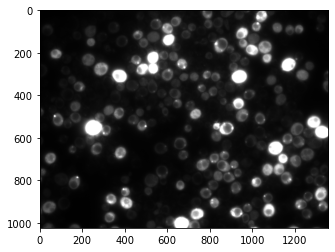

In [13]:
plt.imshow(image, cmap='gray');

In addition to the ```image``` input we also used an *optional* parameter called ```cmap``` here and that allows us to set a certain colormap, here a gray one. You can find more here: https://matplotlib.org/stable/tutorials/colors/colormaps.html#sequential

## Accessing values

We can again display part of the array:

In [14]:
image

array([[219, 225, 220, ..., 256, 258, 272],
       [218, 211, 217, ..., 270, 268, 278],
       [217, 217, 214, ..., 263, 268, 262],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

The first questions is: how do we extract a certain value from the array? Each of the numbers we see above represents a pixel and it has a location (row, column). We can use that location to "extract" the value from the array. For example if we want the top left pixel at ```row=0``` and ```column=0``` we use these coordinates within **square parentheses or brackets**:

In [16]:
image[0,0]

219

We can now even change that value by reassigning another one:

In [17]:
image[0,0] = 2

In [18]:
image

array([[  2, 225, 220, ..., 256, 258, 272],
       [218, 211, 217, ..., 270, 268, 278],
       [217, 217, 214, ..., 263, 268, 262],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

We see that we have indeed changed the value of that top left pixel!

## Accessing parts of the array

Very often we don't need to access a single pixel, but an entire region. In other terms we want to **crop** the image. Let's look again at the image:

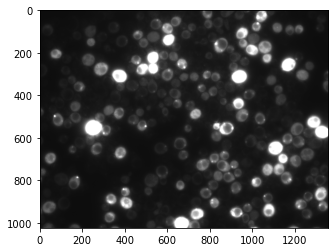

In [19]:
plt.imshow(image, cmap='gray');

Let's say we want to focus our attention on a region in the middle of the image. We can for example take the rows 400-530 and columns 400-600. Instead of just using single coordinates we can now extract that part of the image using a **range** of pixels, the range being indicated via the ```:``` symbol. Here we write:

In [102]:
image[400:530, 400:600]

array([[375, 352, 370, ..., 470, 452, 469],
       [372, 368, 365, ..., 462, 458, 472],
       [381, 370, 359, ..., 478, 461, 480],
       ...,
       [349, 365, 346, ..., 287, 285, 290],
       [333, 349, 340, ..., 288, 276, 275],
       [355, 351, 337, ..., 282, 274, 267]], dtype=uint16)

We can store this new smaller array into a new variable:

In [103]:
cropped = image[400:530, 400:600].copy()

**Note that we additionally use here the ```copy``` method. This ensures that whatever modification we make to the cropped version doesn't affect the original image!**.

We can again plot this cropped image:

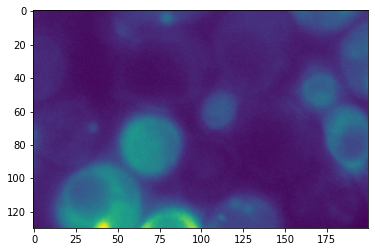

In [104]:
plt.imshow(cropped);

We can also check again the size of this cropped image. We expect 130 rows and 200 columns:

In [105]:
cropped.shape

(130, 200)

If instead of selecting both rows and columns we only want to select a range of rows and take **all** columns, we can just use ```:``` alone:

In [106]:
image[400:530, :].shape

(130, 1360)

We can also leave out the *end* boundary and then it takes all the rows/columns from a certain index to the last one:

In [107]:
image[400:, :].shape

(624, 1360)

## Other ways of creating arrays

In addition to create arrays by importing them, we can also generate them using Numpy functions. This can be useful to initialize some array that we can then re-use later.

There are many different types of arrays that we can create. For example we can create arrays that only contain ```0```s or ```1```s and have a certain shape, e.g. 5 rows and 3 columns, using the ```np.zeros()``` and ```np.ones()``` functions:

In [108]:
np.zeros(shape=(5,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [109]:
np.ones(shape=(5,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

We can also create 1D arrays (only one row) with values regularly distributed. For example we can create an array with numbers from a given ```start``` value to a ```stop``` value in a certain ```step``` size:

In [110]:
np.arange(start=4, stop=12, step=2)

array([ 4,  6,  8, 10])

In addition the ```random``` submodule of Numpy allows us to create arrays with numbers taken from a given distribution. For example we can take numbers from a Poisson distribution of parameter ```lam```. Remember that to access a submodule we use ```np.submodule.function_name```:

In [111]:
np.random.poisson(lam=3, size=(3,5))

array([[2, 5, 4, 2, 4],
       [3, 3, 1, 2, 3],
       [2, 2, 5, 5, 4]])

## Mathematics with arrays

Now that we know how to create or import an array, we can start to do mathematics, or in our case image processing, with these arrays. The advantage of these structures is that we can do mathematics as if we were using plain numbers.

### Basic calculus

For example we can write the mathematical statement $y = x + 3$, and we can write the same thing with an entire array:

In [112]:
cropped_plus_three = cropped + 3

In [113]:
cropped_plus_three

array([[378, 355, 373, ..., 473, 455, 472],
       [375, 371, 368, ..., 465, 461, 475],
       [384, 373, 362, ..., 481, 464, 483],
       ...,
       [352, 368, 349, ..., 290, 288, 293],
       [336, 352, 343, ..., 291, 279, 278],
       [358, 354, 340, ..., 285, 277, 270]], dtype=uint16)

In [114]:
cropped

array([[375, 352, 370, ..., 470, 452, 469],
       [372, 368, 365, ..., 462, 458, 472],
       [381, 370, 359, ..., 478, 461, 480],
       ...,
       [349, 365, 346, ..., 287, 285, 290],
       [333, 349, 340, ..., 288, 276, 275],
       [355, 351, 337, ..., 282, 274, 267]], dtype=uint16)

We see that the statement ```cropped + 3``` is turned by Numpy into "add the value 3 to each pixel in the array called ```cropped```. So we don't have to explicitly add this value to each element, Numpy does it for us!

You can use most common operations with arrays:

In [115]:
cropped * 3
cropped / 3
cropped - 3

array([[372, 349, 367, ..., 467, 449, 466],
       [369, 365, 362, ..., 459, 455, 469],
       [378, 367, 356, ..., 475, 458, 477],
       ...,
       [346, 362, 343, ..., 284, 282, 287],
       [330, 346, 337, ..., 285, 273, 272],
       [352, 348, 334, ..., 279, 271, 264]], dtype=uint16)

You can even raise each pixel to a certain power using the normal power operator:

In [116]:
a = 3

In [117]:
a ** 2

9

In [118]:
cropped ** 2

array([[ 9553, 58368,  5828, ..., 24292,  7696, 23353],
       [ 7312,  4352,  2153, ..., 16836, 13156, 26176],
       [14089,  5828, 63345, ..., 31876, 15913, 33792],
       ...,
       [56265,  2153, 54180, ..., 16833, 15689, 18564],
       [45353, 56265, 50064, ..., 17408, 10640, 10089],
       [60489, 57665, 48033, ..., 13988,  9540,  5753]], dtype=uint16)

Again, this is not some kind of matrix operation, **the squaring operation is applied element-wise**.

### Numpy functions 
In addition to this simple arithmetic, we can apply **entire functions** to these arrays. In particular Numpy has a wide range of functions that take arrays as inputs. For example, we can take the cosine of each element in an image using the ```np.cos()``` function:

In [119]:
np.cos(cropped)

array([[-0.40805453,  0.98998827,  0.7597075 , ...,  0.3258383 ,
         0.925159  , -0.61949694],
       [ 0.27513435, -0.9074341 ,  0.8390551 , ..., -0.982774  ,
         0.7822497 ,  0.7240764 ],
       [-0.64689636,  0.7597075 ,  0.6536208 , ...,  0.88795507,
        -0.6865085 , -0.7877331 ],
       ...,
       [-0.96016186,  0.8390551 ,  0.91111785, ..., -0.44011596,
        -0.6333425 ,  0.56242895],
       [ 0.9999611 , -0.96016186,  0.7596683 , ...,  0.51779556,
         0.89598435,  0.1104172 ],
       [-1.        ,  0.65366644, -0.66029406, ...,  0.73621315,
        -0.776667  , -0.99937433]], dtype=float32)

We won't create an exhaustive list of functions here. If you need a specific one the simplest is just to Google using "numpy name_of_your_operation" and the corresponding documentation should appear as first link.

Above we have used a function that takes an array as input and returns again an array (of the same shape) as output. However there are functions that *summarize* the array and that return for example a single number. For example we can find the maximum value in the array:

In [120]:
np.max(cropped)

1568

Similarly for the min, mean, standard deviation etc.

In [121]:
np.min(cropped)

267

In [122]:
np.mean(cropped)

472.93142307692307

In [123]:
np.std(cropped)

172.53921546746614

Finally note, that some of these functions are also available as **methods** attached to the variable itself. The two following lines are completely equivalent:

In [124]:
np.max(cropped)

1568

In [125]:
cropped.max()

1568

### Operations between arrays

Above we have only seen operations that use a *single* array and that either modified the array or calculated some statistic. But we can also **combine** arrays in different ways, for example we can add two arrays. Again the operation happens **element-wise** and because of this we have to ensure that the two arrays have the **same dimensions**. If they don't Numpy doesn't know what to do with pixels that don't have an equivalent in the other array.

As we are studying image processing, let's simulate noise in our image. We will take our ```cropped``` and add to it some noise (this is commonly done to test algorithms in degraded conditions). Let's use again Poisson noise. Now we need to make sure that we create a noise-image that has the correct dimensions. Those are:

In [126]:
cropped.shape

(130, 200)

Now we can use that shape when creating the noise-array:

In [135]:
noise_image = np.random.poisson(lam=3, size=cropped.shape)

Now we simply add the ```cropped``` image and the ```noise_image```:

In [138]:
corrupted = cropped + 100*noise_image

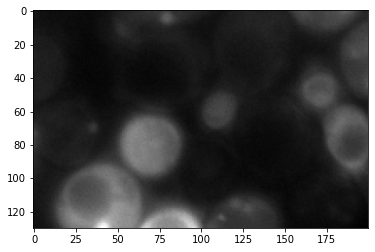

In [139]:
plt.imshow(cropped, cmap='gray');

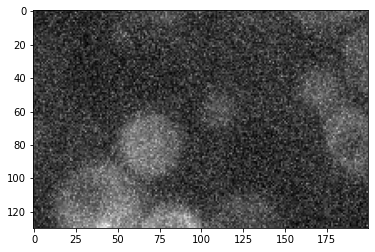

In [140]:
plt.imshow(corrupted, cmap='gray');

You can essentially use all common mathematical operations with arrays of same size.

## Logical operations and indexing

The last important topic concerns logical operations such as $a > 3$. In basic Python we can use these kind of statements:

In [64]:
a = 2

In [65]:
a > 3

False

In [66]:
a < 3

True

We see that the output tells us that the inequality is ```False``` or ```True```. We can actually assign this output to a variable and check its type:

In [68]:
out = a > 3
out

False

In [69]:
type(out)

bool

We see that we get a **boolean** variable. Boolean menas that this is a variable that can only take on two values: True or False (or 1 and 0). Now we can do the same thing with Numpy arrays:

In [141]:
cropped

array([[375, 352, 370, ..., 470, 452, 469],
       [372, 368, 365, ..., 462, 458, 472],
       [381, 370, 359, ..., 478, 461, 480],
       ...,
       [349, 365, 346, ..., 287, 285, 290],
       [333, 349, 340, ..., 288, 276, 275],
       [355, 351, 337, ..., 282, 274, 267]], dtype=uint16)

In [152]:
cropped > 450

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

We see that the output is again a Numpy array and that it is filled with ```True``` and ```False``` values: we have a **boolean array**. Again the comparison here was done **element wise**: each pixel was compared to the value 500 and the result stored in a new array. As with a simple number we can now save this **boolean array** as a variable:

In [154]:
array_bool = cropped > 450

As we are working with an image, what we have just done here is essentially **thresholding**: we created a binary image where pixels say ```True``` above the intensity threshold and ```False``` otherwise. We can actually plot the result:

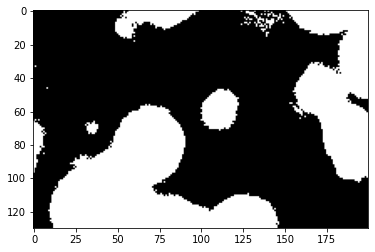

In [155]:
plt.imshow(array_bool, cmap='gray')

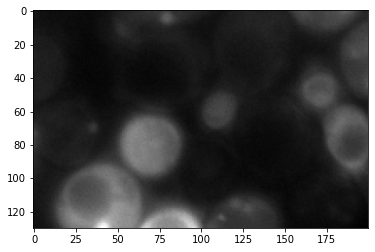

In [156]:
plt.imshow(cropped, cmap='gray');

One very important operation that we can use now is to combine the image with the boolean array **to extract only the ```True``` values** from the image. You can imagine of using the logical array as a mask, superposing it onto the image and extracting only the pixel that are visible through the white regions. The drawing below explains this concept:

In [159]:
from IPython.display import Image
Image(url='https://github.com/guiwitz/ISDAwPython_day2/raw/master/images/logical_indexing.jpeg',width=700)

This operation is performed by passing the boolean array (the indexing one) to the image in square parentheses:

In [160]:
cropped[array_bool]

array([468, 466, 465, ..., 496, 488, 472], dtype=uint16)

As you can see, the output is just 1D array, a list of numbers. Imagine that you want to estimate the average fluorescent intensity in those structures. This is exactly how we would proceed:
1. Find the objects of interest. Here we did it by (bad) manual thresholding
2. Find which pixels belong to these objects. This is done here using the above **logical indexing** ```cropped[array_bool]```
3. Finally compute the average of those values. This can simply be achieved by taking the ```mean``` of the above array:

In [158]:
extracted_pixels = cropped[array_bool]
extracted_pixels.mean()

658.8238455632335